# 二值图像腐蚀

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [5]:
def togray(src):
    dst = np.zeros((src.shape[0],src.shape[1]),dtype=np.float64)
    rgb = np.float64(src)
    dst = 0.299 * rgb[:,:,0] + 0.587 * rgb[:,:,1] + 0.114 * rgb[:,:,2]
    return cv2.convertScaleAbs(dst)

def tobinary(src,thresh):
    dst = np.zeros_like(src)
    dst[src < thresh] = 0
    dst[src >= thresh] = 255
    return dst

def corrosion(src):
    dst = np.zeros_like(src)
    rows,cols = src.shape[0],src.shape[1]
    for x in range(1,rows - 1):
        for y in range(1,cols - 1):
            if src[x,y-1] == 255 and src[x - 1,y] == 255 and \
               src[x,y] == 255 and src[x + 1,y] == 255 and src[x,y + 1] == 255:
                dst[x,y] = 255
            else:
                dst[x,y] = 0
                
    return dst
                

In [6]:
gray = togray(src)
binary = tobinary(gray,160)
dst = corrosion(binary)

Text(0.5,1,'Corrosion')

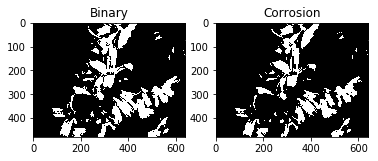

In [7]:
plt.subplot(121)
plt.imshow(binary,'gray')
plt.title('Binary')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Corrosion')

Text(0.5,1,'Diff')

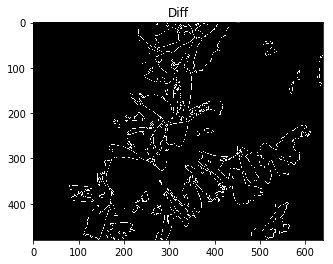

In [8]:
diff = dst - binary
plt.imshow(diff,'gray')
plt.title('Binary-Corrosion')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/44936585